# Lab 4a: Pandas and Principle Component Analysis

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import requests
import csv

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv 
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. In one method call get the shape and print the results.
    2. To get the column headers and print them.
    3. In one method call get the first 5 items and print the results.
    4. Find the mean of each column
3. Create a cancer_x dataframe which includes all of the "mean" columns
4. Update cancer_x to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 
5. Create a cancer_y series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)


In [3]:
#1
bc_df = pd.read_csv('https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv ')
bc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#2 a. 
print(f'Shape of the Breast Cancer Data Frame is {bc_df.shape}')

Shape of the Breast Cancer Data Frame is (569, 33)


In [5]:
#2 b. 

# Before I print the columuns was just testing to see which way of callling its "values"
# was quicker
%timeit bc_df.columns.to_numpy()

%timeit bc_df.columns.values

1.43 µs ± 68 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
390 ns ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
# From the test I can see that .values is faster
# (pandas documentation recomends to_numpy for more consitincy to transforming
# to a numpy array)

# So for this case I chose to use .values since it is quicker

print(f'Headers of the Breast Cancer Data Frame are:\n')
print(f" , ".join(f"{header}" for header in bc_df.columns.values))

Headers of the Breast Cancer Data Frame are:

id , diagnosis , radius_mean , texture_mean , perimeter_mean , area_mean , smoothness_mean , compactness_mean , concavity_mean , concave points_mean , symmetry_mean , fractal_dimension_mean , radius_se , texture_se , perimeter_se , area_se , smoothness_se , compactness_se , concavity_se , concave points_se , symmetry_se , fractal_dimension_se , radius_worst , texture_worst , perimeter_worst , area_worst , smoothness_worst , compactness_worst , concavity_worst , concave points_worst , symmetry_worst , fractal_dimension_worst , Unnamed: 32


In [7]:
#2 c. 
# confused about wording (In one method call get the first 5 items and print the results.)
# which items the first 5 items of the bc_df.items()?
# print(bc_df.items)

first5_items = []
for item_num, item in enumerate(bc_df.items()):
    if item_num > 4:
        break
    first5_items.append(item)
    
print(f'The first 5 items from bc_df.items() (really first 5 vals\n'+
     f'of the first 5 series) are:\n {[(item[0], list(item[1].to_numpy()[:4]))for item in first5_items]}')

The first 5 items from bc_df.items() (really first 5 vals
of the first 5 series) are:
 [('id', [842302, 842517, 84300903, 84348301]), ('diagnosis', ['M', 'M', 'M', 'M']), ('radius_mean', [17.99, 20.57, 19.69, 11.42]), ('texture_mean', [10.38, 17.77, 21.25, 20.38]), ('perimeter_mean', [122.8, 132.9, 130.0, 77.58])]


In [8]:
# 2 d.
print(f'The Means for each Column are:\n\n{bc_df.mean()}')

The Means for each Column are:

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_wor

3. Create a cancer_x dataframe which includes all of the "mean" columns



I figured out a few ways to do this again so testing the speed

In [9]:
%timeit cancer_x = bc_df.filter(like='mean')

356 µs ± 8.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit cancer_x = bc_df.loc[:,list(bc_df.columns.str.contains('mean'))]

372 µs ± 5.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


There does not appear to be a large time advantage with either so I am going to go with loc method

In [11]:
cancer_x = bc_df.loc[:,list(bc_df.columns.str.contains('mean'))]

4. Update cancer_x to be normalized from 0-1, by subtracting by the minimum and dividing by the range.



To start I found a multitude of ways to calculate the range of each column, so I wanted to see which way as faster.

In [12]:
%timeit cancer_x.max()-cancer_x.min()

%timeit cancer_x.apply(np.ptp)

%timeit cancer_x.apply(lambda x: x.max() - x.min())

880 µs ± 79.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.37 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.65 ms ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


I observed that the best way here (ie the quickest) is the simplest using pandas dataframe methods

In [13]:
cancer_x = cancer_x.apply((lambda x: (x - x.min())/(x.max()-x.min())))
cancer_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816
...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442


5. Create a cancer_y series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)

In [14]:
cancer_y = bc_df['diagnosis'].str.lower()
cancer_y.to_frame()

,diagnosis
0,m
1,m
2,m
3,m
4,m
...,...
564,m
565,m
566,m
567,m


In [15]:
cancer_y.value_counts()

b    357
m    212
Name: diagnosis, dtype: int64


## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the columns, store the resulting covariance matrix, and print its shape.

In [16]:
cov_matrix = cancer_x.cov()
print(f'The shape of the covariance matrix is {cov_matrix.shape}')

The shape of the covariance matrix is (10, 10)


2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        1. rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include the `colorbar`.

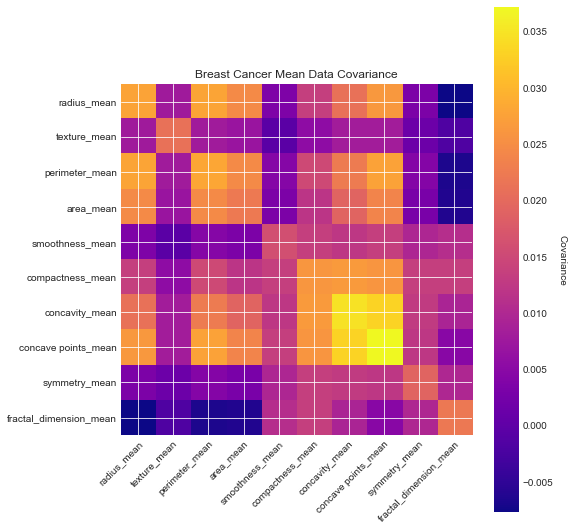

In [17]:
# , title = 'Breast Cancer Covariance Heatmap')
fig, ax = plt.subplots()
cov_heatmap = ax.imshow(cov_matrix, cmap = 'plasma' )

# We want to show all ticks...
ax.set_xticks(np.arange(len(cov_matrix.columns.values)))
ax.set_yticks(np.arange(len(cov_matrix.columns.values)))
# ... and label them with the respective list entries
ax.set_xticklabels(cov_matrix.columns.values)
ax.set_yticklabels(cov_matrix.columns.values)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(cov_matrix.columns.values)):
#     for j in range(len(cov_matrix.columns.values)):
#         text = ax.text(j, i, f'{cov_matrix.values[i, j] : .3f}',
#                        ha="center", va="center", color="w")

# Create colorbar
cbar = ax.figure.colorbar(cov_heatmap, ax=ax)
cbar.ax.set_ylabel('Covariance', rotation=-90, va="bottom")

# Turn spines off and create white grid.
# ax.spines.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Breast Cancer Mean Data Covariance")
fig.tight_layout()
plt.show()

In [18]:
cov_matrix.shape


(10, 10)

Also, when reading about the data set I found this code to make a correlation matrix heatmap which is very clever.
It uses only the libraries we do for the most part. (This is changed a covariance matrix)

Credit to: [Kaggle Bot](https://www.kaggle.com/vishal1809/starter-breast-cancer-wisconsin-0d02a698-b)

In [19]:
# Correlation matrix
def plotCoverianceMatrix(df, graphWidth = 10,title = 'Covariance Matrix', cmap = 'viridis'):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    cov = df.cov()
    covMat = plt.matshow(cov, fignum = 1, cmap = cmap)
    plt.xticks(range(len(cov.columns)), cov.columns, rotation=90)
    plt.yticks(range(len(cov.columns)), cov.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(covMat)
    plt.title(title, fontsize=15)
    plt.show()
    return cov




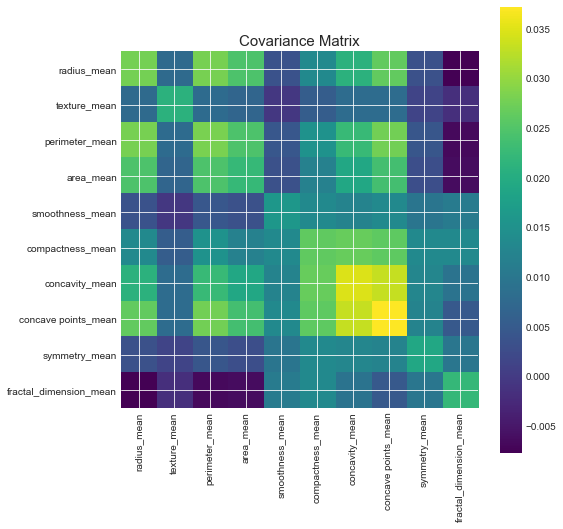

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,0.027818,0.007855,0.027946,0.024582,0.003612,0.013675,0.021083,0.026458,0.003412,-0.007729
texture_mean,0.007855,0.021156,0.008048,0.006972,-0.000432,0.005577,0.008216,0.008232,0.001438,-0.001653
perimeter_mean,0.027946,0.008048,0.028195,0.024727,0.004419,0.015149,0.022461,0.027558,0.004255,-0.006529
area_mean,0.024582,0.006972,0.024727,0.022283,0.003355,0.012054,0.019127,0.023701,0.003127,-0.006284
smoothness_mean,0.003612,-0.000432,0.004419,0.003355,0.016121,0.013557,0.012379,0.013558,0.009805,0.011041
compactness_mean,0.013675,0.005577,0.015149,0.012054,0.013557,0.026242,0.026721,0.025966,0.013517,0.013619
concavity_mean,0.021083,0.008216,0.022461,0.019127,0.012379,0.026721,0.034889,0.033191,0.012948,0.009354
concave points_mean,0.026458,0.008232,0.027558,0.023701,0.013558,0.025966,0.033191,0.037194,0.012350,0.004787
symmetry_mean,0.003412,0.001438,0.004255,0.003127,0.009805,0.013517,0.012948,0.012350,0.019170,0.009881
fractal_dimension_mean,-0.007729,-0.001653,-0.006529,-0.006284,0.011041,0.013619,0.009354,0.004787,0.009881,0.022112


In [20]:
plotCoverianceMatrix(cancer_x, 'Breast Cancer Mean Covariance Matrix')

**Question:** What interpretations can you draw from this covariance matrix?

## Task 3: Visualizing Principle Component Analysis

### 3a) Principle Component Analysis
1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  
2. Print the eigen_values and the first 2 eigenvectors.

In [29]:
e_vals, e_vects = np.linalg.eig(cov_matrix)

3. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.

In [30]:
transformed_cancer_data = cancer_x @ e_vects[:,:2]

**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

In [34]:
print(f'The Eigen Values Are:\n{e_vals}\n'+
      f'The First 2 Eigen Vectors Are:\n{e_vects[:,:2]}\n'+
      f'The First 5 Rows of Transformed Data:\n{transformed_cancer_data.values[:5]}')
print('''
-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------
''')

The Eigen Values Are:
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121
 0.00206]
The First 2 Eigen Vectors Are:
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
The First 5 Rows of Transformed Data:
[[-1.69205 -0.74676]
 [-1.10577  0.15841]
 [-1.47931 -0.15926]
 [-1.33507 -1.28654]
 [-1.36498 -0.03687]]

-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.

### 3b) Graph a scatterplot of the transformed data

Graph a scatterplot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html) using mpatches.
    1. Create 1 patch with the color `m` for malignant
    1. Create 1 patch with the color `b` for benign

In [3]:
import matplotlib.patches as mpatches

